In [1]:
import import_ipynb
from hormigas import *

# from ipynb.fs.full.algoritmos import *
import csv
import sys

importing Jupyter notebook from hormigas.ipynb


In [2]:
def algoritmo_SH(semilla, num_nodos, distancias, num_hormigas, num_iteraciones, feromona_ini, heuristica, alpha, beta, evaporacion, nodo_inicial=None):
    
    # Aplicamos la semilla
    random.seed(semilla)
    
    # Representacion
    xs, ys = [], []
    
    # Inicializamos los atributos de la clase Hormiga
    Hormiga.num_nodos = num_nodos
    Hormiga.distancias = distancias
    
    # Inicializamos la matriz de feromonas
    feromona = [[feromona_ini]*len(nodos) for i in range(len(nodos))]
    
    mejor_global = None
    for it in range(num_iteraciones):
        
        sys.__stdout__.write(f"It:{it}\n")
        
        # Inicializamos las hormigas al nodo inicial
        hormigas = []
        for k in range(num_hormigas):
            hormigas.append(Hormiga(nodo_inicial))
        
        # Construcción de soluciones por las hormigas
        for i in range(num_hormigas):
            for k in range(num_nodos-1):
                # Añadimos el nodo resultante de aplicar la regla de transición
                hormigas[i].add(regla_transicion(hormigas[i], feromona, heuristica, alpha, beta))
            
        # Actualización de feromona: Aporte y evaporación
        for i in range(num_nodos):
            for j in range(num_nodos):
                feromona[i][j] = actualizacion_feromona(feromona[i][j], hormigas, evaporacion, i, j)
                
        # Actualización de la mejor solucion global
        mejor_actual = min(hormigas)

        if mejor_global is None or mejor_actual < mejor_global:
            mejor_global = mejor_actual
            
        # Representación
        xs.append(it)
        ys.append(mejor_global.coste)
            
        
    return [mejor_global, semilla, xs, ys]

In [3]:
def algoritmo_SHE(semilla, num_nodos, distancias, num_hormigas, num_iteraciones, feromona_ini, heuristica, alpha, beta, evaporacion, num_elite, nodo_inicial=None):
    
    # Aplicamos la semilla
    random.seed(semilla)
    
    # Representacion
    xs, ys = [], []
    
    # Inicializamos los atributos de la clase Hormiga
    Hormiga.num_nodos = num_nodos
    Hormiga.distancias = distancias
    
    # Inicializamos la matriz de feromonas
    feromona = [[feromona_ini]*len(nodos) for i in range(len(nodos))]
    
    mejor_global = None
    for it in range(num_iteraciones):
    
        sys.__stdout__.write(f"It:{it}\n")
            
        # Inicializamos las hormigas al nodo inicial
        hormigas = []
        for k in range(num_hormigas):
            hormigas.append(Hormiga(nodo_inicial))
        
        # Construcción de soluciones por las hormigas
        for i in range(num_hormigas):
            for k in range(num_nodos-1):
                # Añadimos el nodo resultante de aplicar la regla de transición
                hormigas[i].add(regla_transicion(hormigas[i], feromona, heuristica, alpha, beta))
            
        # Actualización de feromona: Aporte y evaporación
        for i in range(num_nodos):
            for j in range(num_nodos):
                feromona[i][j] = actualizacion_feromona_elite(feromona[i][j], hormigas, evaporacion, i, j, num_elite)
                
        # Actualización de la mejor solucion global
        mejor_actual = min(hormigas)

        if mejor_global is None or mejor_actual < mejor_global:
            mejor_global = mejor_actual
            
        # Representación
        xs.append(it)
        ys.append(mejor_global.coste)
            
    return [mejor_global, semilla, xs, ys]

In [4]:
def algoritmo_SCH(semilla, num_nodos, distancias, num_hormigas, num_iteraciones, feromona_ini, heuristica, alpha, beta, evaporacion, evaporacion_local, q0, nodo_inicial=None):
    
    # Aplicamos la semilla
    random.seed(semilla)
    
    # Representacion
    xs, ys = [], []
    
    # Inicializamos los atributos de la clase Hormiga
    Hormiga.num_nodos = num_nodos
    Hormiga.distancias = distancias
    
    # Inicializamos la matriz de feromonas
    feromona = [[feromona_ini]*len(nodos) for i in range(len(nodos))]
    
    mejor_global = None
    for it in range(num_iteraciones):
        
        sys.__stdout__.write(f"It:{it}\n")
        
        # Inicializamos las hormigas al nodo inicial
        hormigas = []
        for k in range(num_hormigas):
            hormigas.append(Hormiga(nodo_inicial))
        
        # Construcción de soluciones por las hormigas
        for i in range(num_hormigas):
            for k in range(num_nodos-1):
                # Añadimos el nodo resultante de aplicar la regla de transición
                nodo_anterior = hormigas[i].camino[-1]
                nodo = regla_transicion_SCH(hormigas[i], feromona, heuristica, alpha, beta, q0)
                hormigas[i].add(nodo)
                
                # Actualización LOCAL feromona
                feromona[nodo_anterior][nodo] = actualizacion_feromona_local(feromona[nodo_anterior][nodo], feromona_ini, evaporacion_local)
            
                
        # Actualización de la mejor solucion global
        mejor_actual = min(hormigas)

        if mejor_global is None or mejor_actual < mejor_global:
            mejor_global = mejor_actual
        
        # Actualización GLOBAL de la feromona
        # Solo se aplica sobre los arcos de la mejor_global
        for r,s in pairwise(mejor_global.camino):
            feromona[r][s] = actualizacion_feromona_global(feromona[r][s], mejor_global, evaporacion)
        
            
        # Representación
        xs.append(it)
        ys.append(mejor_global.coste)
            
    return [mejor_global, semilla, xs, ys]

# Sistema de Hormigas

Sistema de Hormigas
Tiempo de ejecución: 981.358001

Mejor sol Coste: 6783 	 Semilla: 4202174
-------- PARÁMETROS ALGORITMO ---------
num_hormigas:	 10
num_iteraciones:	 130
feromona_ini:	 1.0149502166918712e-06
alpha:	 1
beta:	 2
evaporacion:	 0.1
------------------------------------------


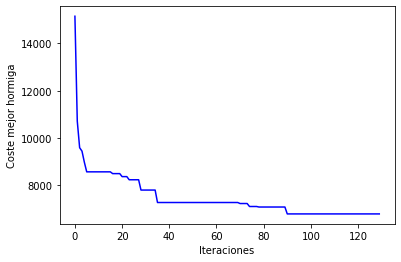

<Figure size 864x864 with 0 Axes>

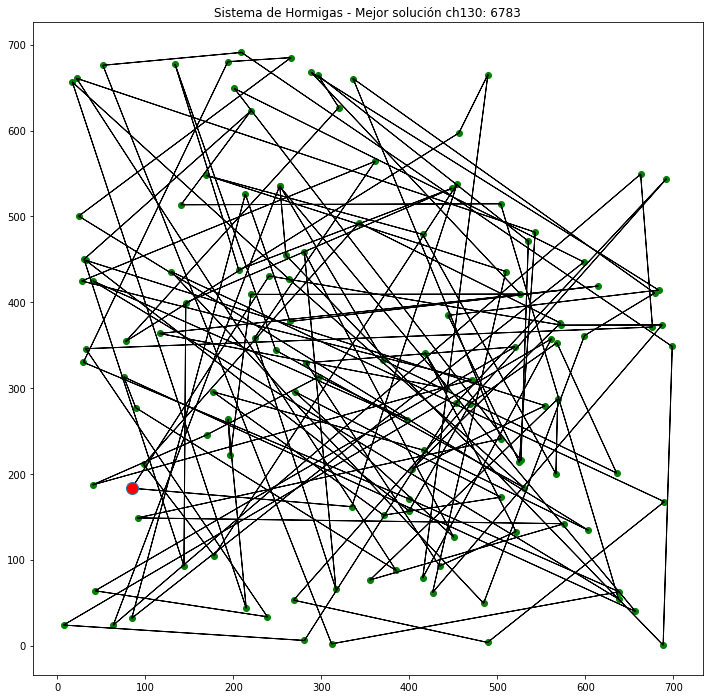

In [13]:
%matplotlib notebook
%matplotlib inline
fig, ax = plt.subplots(1,1)
plt.figure(figsize=(12,12)) 
ax.set_xlabel('Iteraciones') ; ax.set_ylabel('Coste mejor hormiga')

algoritmo = "Sistema de Hormigas"
print(algoritmo)
fichero = "ch130"
nodos = leeFichero(fichero)
num_nodos = len(nodos)    # Fichero
distancias = getMDistancias(nodos)
semilla = random.randint(0,9999999)

# PARAMETROS DEL ALGORITMO
num_hormigas = 10
num_iteraciones = num_nodos
feromona_ini = 1 / (num_nodos * getCosteCamino(algoritmoGreedy(distancias), distancias))
alpha = 1
beta = 2
evaporacion = 0.1

# Iniciamos la heuristica 1/d
heuristica = []
for row in range(len(distancias)):
    heuristica.append([1/(x+0.01) for x in distancias[row]])

t = time.time()

# with Pool(processes=6) as p:
#        resultados = p.starmap(algoritmo_SH, product([semilla], [num_nodos], [distancias], [num_hormigas], [num_iteraciones], [feromona_ini], [heuristica], [alpha], [beta], [evaporacion]))[0]


resultados = algoritmo_SH(semilla, num_nodos, distancias, num_hormigas, num_iteraciones, feromona_ini, heuristica, alpha, beta, evaporacion)

elapsed = time.time() - t
print("Tiempo de ejecución: %f\n" % elapsed )

coste = resultados[0].coste

print("Mejor sol Coste: %s \t Semilla: %s" % (coste, semilla) ) 
print("-------- PARÁMETROS ALGORITMO ---------")
print("num_hormigas:\t", num_hormigas)
print("num_iteraciones:\t", num_iteraciones)
print("feromona_ini:\t", feromona_ini)
print("alpha:\t", alpha)
print("beta:\t", beta)
print("evaporacion:\t", evaporacion)
print("------------------------------------------")

xs = resultados[2]
ys = resultados[3]

plt_dynamic(fig, xs, ys, ax)


## Tests SH

In [7]:
print("Sistema de Hormigas")
ficheros = ["ch130","a280"]

# Resultados globales
resultadosCoste = [[] for x in range(len(ficheros))]


for i_fichero, fichero in enumerate(ficheros):
    
    print(f"\nFichero: {fichero}")
    nodos = leeFichero(fichero)
    distancias = getMDistancias(nodos)
    num_nodos = len(nodos)    # Fichero
    
    # PARAMETROS DEL ALGORITMO
    num_hormigas = 10
    num_iteraciones = 100 
    feromona_ini = 1 / (num_nodos * getCosteCamino(algoritmoGreedy(distancias), distancias))
    alpha = 1
    beta = 2
    evaporacion = 0.1
    
    print("\n-------- PARÁMETROS ALGORITMO ---------")
    print("num_hormigas:\t", num_hormigas)
    print("num_iteraciones:\t", num_iteraciones)
    print("feromona_ini:\t", feromona_ini)
    print("alpha:\t", alpha)
    print("beta:\t", beta)
    print("evaporacion:\t", evaporacion)
    print("------------------------------------------")

    # Iniciamos la heuristica 1/d
    heuristica = []
    for row in range(len(distancias)):
        heuristica.append([1/(x+0.01) for x in distancias[row]])
    
    for ejecucion in range(5):
        
        semilla = random.randint(0,9999999)
        

        t = time.time()

        # with Pool(processes=6) as p:
        #        resultados = p.starmap(algoritmo_SH, product([semilla], [num_nodos], [distancias], [num_hormigas], [feromona_ini], [heuristica], [alpha], [beta], [evaporacion]))[0]


        resultados = algoritmo_SH(semilla, num_nodos, distancias, num_hormigas, num_iteraciones, feromona_ini, heuristica, alpha, beta, evaporacion)

        mejorIndividuo = resultados[0]
        resultadosCoste[i_fichero].append(mejorIndividuo.coste)
        
        print("\t%i) Mejor sol Coste: %s\t Semilla: %s" % (ejecucion+1, mejorIndividuo.coste, semilla)) 
        
# Escribimos un fichero CSV
header = []
for fich in ficheros:
    header.append(fich+"-Coste")

row_list = [header]
for x in range(5):
    row_list.append([])

for i in range(5):
    for fi, fich in enumerate(ficheros):
        row_list[i+1].append(resultadosCoste[fi][i])
        
nombre_fichero = 'hormigasSH.csv'
with open(nombre_fichero, 'w', newline='') as file:
    writer = csv.writer(file, delimiter=';')
    writer.writerows(row_list)

    print("Resultados guardados con éxito en: ", nombre_fichero)

Sistema de Hormigas

Fichero: ch130

-------- PARÁMETROS ALGORITMO ---------
num_hormigas:	 10
num_iteraciones:	 100
feromona_ini:	 1.0149502166918712e-06
alpha:	 1
beta:	 2
evaporacion:	 0.1
------------------------------------------


KeyboardInterrupt: 

# Sistema de Hormigas Elitista

Sistema de Hormigas Elitista
Tiempo de ejecución: 988.531997

Mejor sol Coste: 6930 	 Semilla: 7182443

-------- PARÁMETROS ALGORITMO ---------
num_hormigas:	 10
num_iteraciones:	 130
feromona_ini:	 1.0149502166918712e-06
alpha:	 1
beta:	 2
evaporacion:	 0.1
------------------------------------------


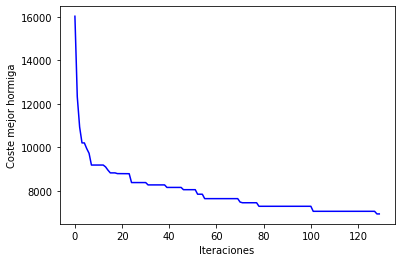

<Figure size 864x864 with 0 Axes>

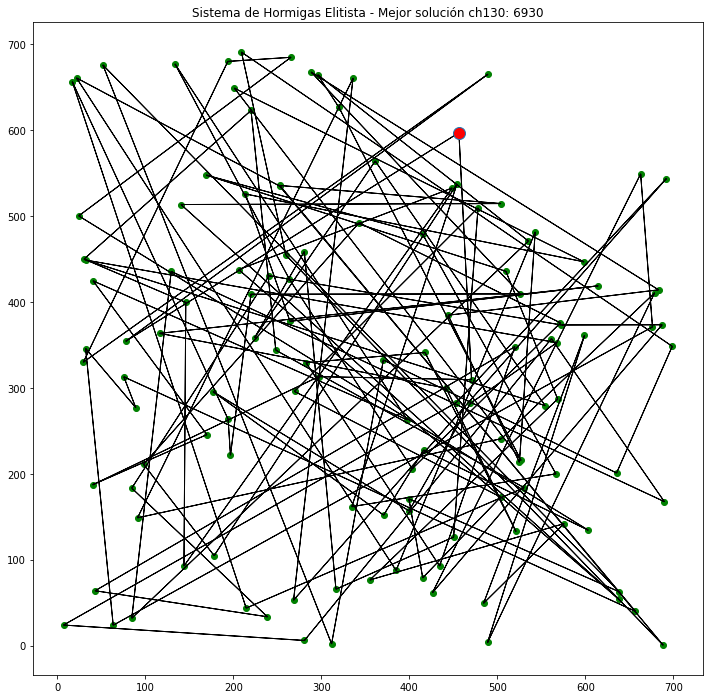

In [11]:
%matplotlib notebook
%matplotlib inline
fig, ax = plt.subplots(1,1)
plt.figure(figsize=(12,12)) 
ax.set_xlabel('Iteraciones') ; ax.set_ylabel('Coste mejor hormiga')

algoritmo = "Sistema de Hormigas Elitista"
print(algoritmo)
fichero = "ch130"
nodos = leeFichero(fichero)
num_nodos = len(nodos)    # Fichero
distancias = getMDistancias(nodos)
semilla = random.randint(0,9999999)

# PARAMETROS DEL ALGORITMO
num_hormigas = 10
num_iteraciones = num_nodos 
feromona_ini = 1 / (num_nodos * getCosteCamino(algoritmoGreedy(distancias), distancias))
alpha = 1
beta = 2
evaporacion = 0.1
num_elite = 15

# Iniciamos la heuristica 1/d
heuristica = []
for row in range(len(distancias)):
    heuristica.append([1/(x+0.01) for x in distancias[row]])

t = time.time()

# with Pool(processes=6) as p:
#        resultados = p.starmap(algoritmo_SH, product([semilla], [num_nodos], [distancias], [num_hormigas], [feromona_ini], [heuristica], [alpha], [beta], [evaporacion]))[0]


resultados = algoritmo_SHE(semilla, num_nodos, distancias, num_hormigas, num_iteraciones, feromona_ini, heuristica, alpha, beta, evaporacion, num_elite)

elapsed = time.time() - t
print("Tiempo de ejecución: %f\n" % elapsed )

coste = resultados[0].coste

print("Mejor sol Coste: %s \t Semilla: %s" % (coste, semilla) ) 

print("\n-------- PARÁMETROS ALGORITMO ---------")
print("num_hormigas:\t", num_hormigas)
print("num_iteraciones:\t", num_iteraciones)
print("feromona_ini:\t", feromona_ini)
print("alpha:\t", alpha)
print("beta:\t", beta)
print("evaporacion:\t", evaporacion)
print("num_elite:\t", num_elite)
print("------------------------------------------")


xs = resultados[2]
ys = resultados[3]

plt_dynamic(fig, xs, ys, ax)


## Tests SHE

In [ ]:
print("Sistema de Hormigas Elitista")
ficheros = ["ch130","a280"]

# Resultados globales
resultadosCoste = [[] for x in range(len(ficheros))]


for i_fichero, fichero in enumerate(ficheros):
    
    print(f"\nFichero: {fichero}")
    nodos = leeFichero(fichero)
    distancias = getMDistancias(nodos)
    num_nodos = len(nodos)    # Fichero
    
    # PARAMETROS DEL ALGORITMO
    num_hormigas = 10
    num_iteraciones = 100 
    feromona_ini = 1 / (num_nodos * getCosteCamino(algoritmoGreedy(distancias), distancias))
    alpha = 1
    beta = 2
    evaporacion = 0.1
    num_elite = 15
    
    print("\n-------- PARÁMETROS ALGORITMO ---------")
    print("num_hormigas:\t", num_hormigas)
    print("num_iteraciones:\t", num_iteraciones)
    print("feromona_ini:\t", feromona_ini)
    print("alpha:\t", alpha)
    print("beta:\t", beta)
    print("evaporacion:\t", evaporacion)
    print("num_elite:\t", num_elite)
    print("------------------------------------------")

    # Iniciamos la heuristica 1/d
    heuristica = []
    for row in range(len(distancias)):
        heuristica.append([1/(x+0.01) for x in distancias[row]])
    
    for ejecucion in range(5):
        
        semilla = random.randint(0,9999999)
        

        t = time.time()

        # with Pool(processes=6) as p:
        #        resultados = p.starmap(algoritmo_SH, product([semilla], [num_nodos], [distancias], [num_hormigas], [feromona_ini], [heuristica], [alpha], [beta], [evaporacion]))[0]


        resultados = algoritmo_SHE(semilla, num_nodos, distancias, num_hormigas, num_iteraciones, feromona_ini, heuristica, alpha, beta, evaporacion, num_elite)

        mejorIndividuo = resultados[0]
        resultadosCoste[i_fichero].append(mejorIndividuo.coste)
        
        print("\t%i) Mejor sol Coste: %s\t Semilla: %s" % (ejecucion+1, mejorIndividuo.coste, semilla)) 
        
# Escribimos un fichero CSV
header = []
for fich in ficheros:
    header.append(fich+"-Coste")

row_list = [header]
for x in range(5):
    row_list.append([])

for i in range(5):
    for fi, fich in enumerate(ficheros):
        row_list[i+1].append(resultadosCoste[fi][i])
        
nombre_fichero = 'hormigasSHE.csv'
with open(nombre_fichero, 'w', newline='') as file:
    writer = csv.writer(file, delimiter=';')
    writer.writerows(row_list)

    print("Resultados guardados con éxito en: ", nombre_fichero)

# Sistema de Colonia de Hormigas

Sistema de Colonia de Hormigas
Tiempo de ejecución: 15.693502

Mejor sol Coste: 7036 	 Semilla: 1055843
-------- PARÁMETROS ALGORITMO ---------
num_hormigas:	 10
num_iteraciones:	 130
feromona_ini:	 1.0149502166918712e-06
alpha:	 1
beta:	 2
evaporacion:	 0.1
evaporacion_local:	 0.1
q0:	 0.98
------------------------------------------


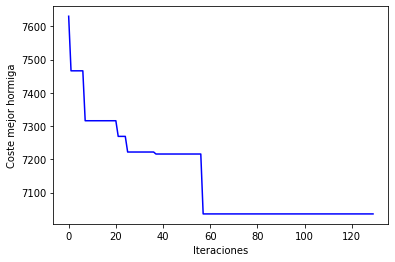

<Figure size 864x864 with 0 Axes>

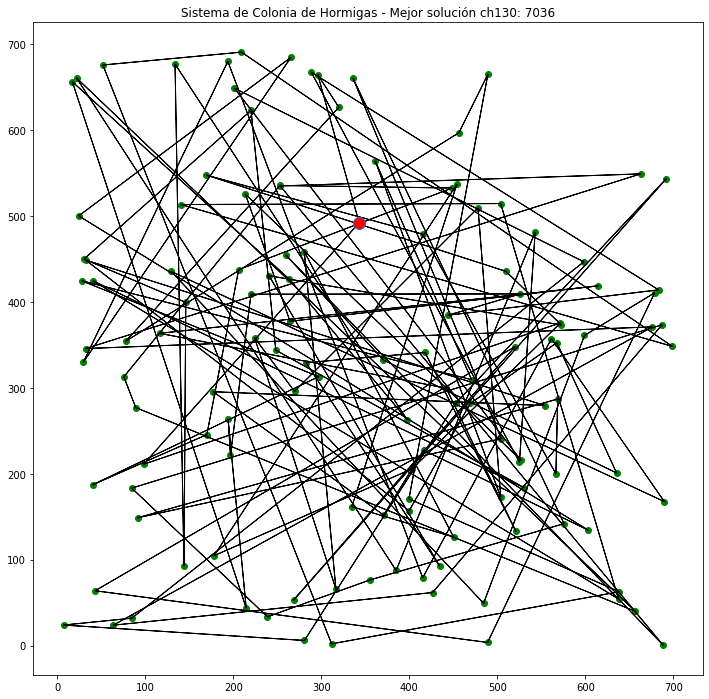

In [12]:
%matplotlib notebook
%matplotlib inline
fig, ax = plt.subplots(1,1)
plt.figure(figsize=(12,12)) 
ax.set_xlabel('Iteraciones') ; ax.set_ylabel('Coste mejor hormiga')

algoritmo = "Sistema de Colonia de Hormigas"
print(algoritmo)
fichero = "ch130"
nodos = leeFichero(fichero)
num_nodos = len(nodos)    # Fichero
distancias = getMDistancias(nodos)
semilla = random.randint(0,9999999)

# PARAMETROS DEL ALGORITMO
num_hormigas = 10
num_iteraciones = num_nodos
feromona_ini = 1 / (num_nodos * getCosteCamino(algoritmoGreedy(distancias), distancias))
alpha = 1
beta = 2
evaporacion = 0.1
evaporacion_local = 0.1
q0 = 0.98

# Iniciamos la heuristica 1/d
heuristica = []
for row in range(len(distancias)):
    heuristica.append([1/(x+0.01) for x in distancias[row]])

t = time.time()

# with Pool(processes=6) as p:
#        resultados = p.starmap(algoritmo_SH, product([semilla], [num_nodos], [distancias], [num_hormigas], [feromona_ini], [heuristica], [alpha], [beta], [evaporacion]))[0]


resultados = algoritmo_SCH(semilla, num_nodos, distancias, num_hormigas, num_iteraciones, feromona_ini, heuristica, alpha, beta, evaporacion, evaporacion_local, q0)

elapsed = time.time() - t
print("Tiempo de ejecución: %f\n" % elapsed )

coste = resultados[0].coste

print("Mejor sol Coste: %s \t Semilla: %s" % (coste, semilla) ) 
print("-------- PARÁMETROS ALGORITMO ---------")
print("num_hormigas:\t", num_hormigas)
print("num_iteraciones:\t", num_iteraciones)
print("feromona_ini:\t", feromona_ini)
print("alpha:\t", alpha)
print("beta:\t", beta)
print("evaporacion:\t", evaporacion)
print("evaporacion_local:\t", evaporacion_local)
print("q0:\t", q0)
print("------------------------------------------")

xs = resultados[2]
ys = resultados[3]

plt_dynamic(fig, xs, ys, ax)



## Tests SCH

In [ ]:
print("Sistema de Colonia de Hormigas")
ficheros = ["ch130","a280"]

# Resultados globales
resultadosCoste = [[] for x in range(len(ficheros))]


for i_fichero, fichero in enumerate(ficheros):
    
    print(f"\nFichero: {fichero}")
    nodos = leeFichero(fichero)
    distancias = getMDistancias(nodos)
    num_nodos = len(nodos)    # Fichero
    
    # PARAMETROS DEL ALGORITMO
    num_hormigas = 10
    num_iteraciones = 100 
    feromona_ini = 1 / (num_nodos * getCosteCamino(algoritmoGreedy(distancias), distancias))
    alpha = 1
    beta = 2
    evaporacion = 0.1
    num_elite = 15
    
    print("-------- PARÁMETROS ALGORITMO ---------")
    print("num_hormigas:\t", num_hormigas)
    print("num_iteraciones:\t", num_iteraciones)
    print("feromona_ini:\t", feromona_ini)
    print("alpha:\t", alpha)
    print("beta:\t", beta)
    print("evaporacion:\t", evaporacion)
    print("evaporacion_local:\t", evaporacion_local)
    print("q0:\t", q0)
    print("------------------------------------------")
    
    # Iniciamos la heuristica 1/d
    heuristica = []
    for row in range(len(distancias)):
        heuristica.append([1/(x+0.01) for x in distancias[row]])
    
    for ejecucion in range(5):
        
        semilla = random.randint(0,9999999)
        

        t = time.time()

        # with Pool(processes=6) as p:
        #        resultados = p.starmap(algoritmo_SH, product([semilla], [num_nodos], [distancias], [num_hormigas], [feromona_ini], [heuristica], [alpha], [beta], [evaporacion]))[0]


        resultados = algoritmo_SCH(semilla, num_nodos, distancias, num_hormigas, num_iteraciones, feromona_ini, heuristica, alpha, beta, evaporacion, evaporacion_local, q0)

        mejorIndividuo = resultados[0]
        resultadosCoste[i_fichero].append(mejorIndividuo.coste)
        
        print("\t%i) Mejor sol Coste: %s\t Semilla: %s" % (ejecucion+1, mejorIndividuo.coste, semilla)) 
        
# Escribimos un fichero CSV
header = []
for fich in ficheros:
    header.append(fich+"-Coste")

row_list = [header]
for x in range(5):
    row_list.append([])

for i in range(5):
    for fi, fich in enumerate(ficheros):
        row_list[i+1].append(resultadosCoste[fi][i])
        
nombre_fichero = 'hormigasSCH.csv'
with open(nombre_fichero, 'w', newline='') as file:
    writer = csv.writer(file, delimiter=';')
    writer.writerows(row_list)

    print("Resultados guardados con éxito en: ", nombre_fichero)